In [190]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

import ast

# import plotly.graph_objs as go 
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=True) 

In [191]:
movie_meta = pd.read_csv('./the-movies-dataset/movies_metadata.csv', low_memory = False)

In [192]:
movie_meta['id'] = pd.to_numeric(movie_meta['id'],errors ='coerce',downcast = 'integer')

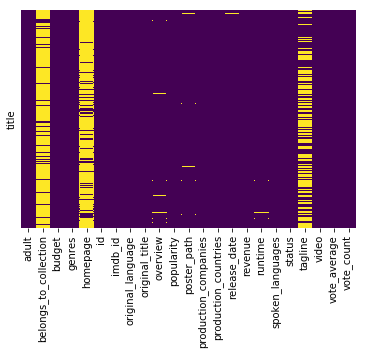

In [5]:
sns.heatmap(movie_meta.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [193]:
movie_meta = movie_meta.dropna(thresh = 5)

In [194]:
movie_meta = movie_meta.set_index('id', drop = True)

In [195]:
movie_meta = movie_meta.drop(['homepage', 'imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 'status', 'tagline', 'video'],
               axis = 1)

In [196]:
movie_meta.loc[(movie_meta['adult'] != 'True') & (movie_meta['adult'] != 'False'), 'adult'] = False

In [197]:
movie_meta['adult'] = movie_meta['adult'].map({'True': True, 'False': False})

In [198]:
movie_meta['belongs_to_collection'] = movie_meta['belongs_to_collection'].notna()

In [199]:
movie_meta['budget'] = pd.to_numeric(movie_meta['budget'], errors = 'coerce')
# revenue is already a float
movie_meta.loc[(movie_meta['budget'] == 0) & (movie_meta['revenue'] == 0), 'revenue'] = np.nan
movie_meta.loc[movie_meta['budget'] == 0, 'budget'] = np.nan

In [200]:
def scale(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 1000
    else:
        return num

In [201]:
movie_meta[['budget', 'revenue']] = movie_meta[['budget', 'revenue']].applymap(scale)

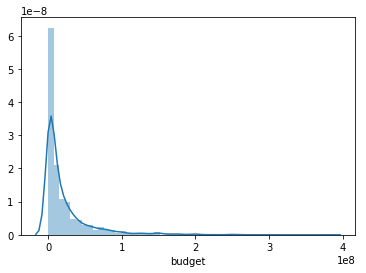

In [14]:
sns.distplot(movie_meta[movie_meta['budget'].notnull()]['budget'])

In [202]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            #return values
            return '|'.join(values)
        else:
            return None

In [203]:
movie_meta[['genres', 'production_companies', 'production_countries', 'spoken_languages']] = movie_meta[['genres', 'production_companies', 'production_countries', 'spoken_languages']].applymap(get_values)

In [204]:
movie_meta = movie_meta.drop(['vote_average', 'vote_count', 'adult', 'belongs_to_collection', 'budget', 'release_date', 'revenue', 'runtime', 'spoken_languages' ], axis = 1)

In [205]:
movie_meta.head(5)

,genres,original_language,production_companies,production_countries,title
id,,,,,
862.0,Animation|Comedy|Family,en,Pixar Animation Studios,United States of America,Toy Story
8844.0,Adventure|Fantasy|Family,en,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,Jumanji
15602.0,Romance|Comedy,en,Warner Bros.|Lancaster Gate,United States of America,Grumpier Old Men
31357.0,Comedy|Drama|Romance,en,Twentieth Century Fox Film Corporation,United States of America,Waiting to Exhale
11862.0,Comedy,en,Sandollar Productions|Touchstone Pictures,United States of America,Father of the Bride Part II


In [206]:
#temp = movie_meta

### Genre data extract

In [207]:
genre_data = movie_meta.genres.str.split('|', expand=True).stack()
genre_data

id         
862.0     0          Animation
          1             Comedy
          2             Family
8844.0    0          Adventure
          1            Fantasy
          2             Family
15602.0   0            Romance
          1             Comedy
31357.0   0             Comedy
          1              Drama
          2            Romance
11862.0   0             Comedy
949.0     0             Action
          1              Crime
          2              Drama
          3           Thriller
11860.0   0             Comedy
          1            Romance
45325.0   0             Action
          1          Adventure
          2              Drama
          3             Family
9091.0    0             Action
          1          Adventure
          2           Thriller
710.0     0          Adventure
          1             Action
          2           Thriller
9087.0    0             Comedy
          1              Drama
                    ...       
49280.0   0            Fant

In [208]:
value_counts = genre_data.to_frame()[0].value_counts()
#to_remove = value_counts[value_counts <= 80].index
to_keep = value_counts[value_counts > 1000].index.tolist()
to_keep.remove('')
to_keep

['Drama',
 'Comedy',
 'Thriller',
 'Romance',
 'Action',
 'Horror',
 'Crime',
 'Documentary',
 'Adventure',
 'Science Fiction',
 'Family',
 'Mystery',
 'Fantasy',
 'Animation',
 'Foreign',
 'Music',
 'History',
 'War',
 'Western']

In [209]:
OHencoder = OneHotEncoder(categories = [to_keep],sparse =False, handle_unknown="ignore")
df2 = OHencoder.fit_transform(genre_data.to_frame())

In [210]:
genre_col_names = [ 'genre_' + s for s in to_keep]
df2 = pd.DataFrame(df2,index = genre_data.index, columns =genre_col_names)
df2 = df2.groupby(level=0).sum()
genre_data = df2
genre_data

,genre_Drama,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,genre_Horror,genre_Crime,genre_Documentary,genre_Adventure,genre_Science Fiction,genre_Family,genre_Mystery,genre_Fantasy,genre_Animation,genre_Foreign,genre_Music,genre_History,genre_War,genre_Western
id,,,,,,,,,,,,,,,,,,,
2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#use "sparse = True" in get_dummies, in case of memory issue
genre_data = pd.get_dummies(genre_data, prefix='genre').groupby(level=0).sum()

remove = list(genre_data.sum(axis = 0, skipna = True))

cols = [i for i in range(len(remove)) if remove[i]<1000]
genre_data.drop(genre_data.columns[cols],axis=1,inplace=True)

genre_data

### production companies

In [211]:
prod_comp_data = movie_meta.production_countries.str.split('|', expand=True).stack()

In [212]:
#use "sparse = True" in get_dummies, in case of memory issue
prod_comp_data = pd.get_dummies(prod_comp_data, prefix='prod_comp').groupby(level=0).sum()

In [213]:
remove = list(prod_comp_data.sum(axis = 0, skipna = True))

In [214]:
cols = [i for i in range(len(remove)) if remove[i]<200 or remove[i]>2000]
prod_comp_data.drop(prod_comp_data.columns[cols],axis=1,inplace=True)

### production countries

In [215]:
prod_ctry_data = movie_meta.genres.str.split('|', expand=True).stack()

In [216]:
prod_ctry_data = pd.get_dummies(prod_ctry_data, prefix='prod_ctry').groupby(level=0).sum()

In [217]:
remove = list(prod_comp_data.sum(axis = 0, skipna = True))

In [218]:
cols = [i for i in range(len(remove)) if remove[i]<200 or remove[i]>2000]
prod_ctry_data.drop(prod_comp_data.columns[cols],axis=1,inplace=True)

In [219]:
prod_ctry_data.drop('prod_ctry_',axis=1,inplace = True)

In [220]:
cast_data = pd.read_csv("movie_cross_cast.csv")
cast_data.set_index('id',inplace=True)

In [221]:
print(genre_data.shape, prod_comp_data.shape, prod_ctry_data.shape,cast_data.shape )

((45433, 19), (45430, 23), (45433, 32), (45432, 13))


genre_data = genre_data.div(genre_data.shape[1])
prod_comp_data = prod_comp_data.div(prod_comp_data.shape[1])
prod_ctry_data = prod_ctry_data.div(prod_ctry_data.shape[1])
cast_data = cast_data.div(cast_data.shape[1])




In [222]:
out_data = pd.concat([genre_data,cast_data, prod_comp_data, prod_ctry_data], axis=1)
out_data.shape

(45433, 87)

In [223]:
out_data.to_csv("movies_cross_features.csv", encoding='utf-8')

In [224]:
out_data

,genre_Drama,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,genre_Horror,genre_Crime,genre_Documentary,genre_Adventure,genre_Science Fiction,...,prod_ctry_Romance,prod_ctry_Science Fiction,prod_ctry_Sentai Filmworks,prod_ctry_TV Movie,prod_ctry_Telescene Film Group Productions,prod_ctry_The Cartel,prod_ctry_Thriller,prod_ctry_Vision View Entertainment,prod_ctry_War,prod_ctry_Western
id,,,,,,,,,,,,,,,,,,,,,
2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
# prod_ctry_data.drop('prod_ctry_',axis=1)
genre_data

,genre_Drama,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,genre_Horror,genre_Crime,genre_Documentary,genre_Adventure,genre_Science Fiction,genre_Family,genre_Mystery,genre_Fantasy,genre_Animation,genre_Foreign,genre_Music,genre_History,genre_War,genre_Western
id,,,,,,,,,,,,,,,,,,,
2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# flat_list = [item for sublist in fat_list for item in sublist]

In [36]:
# dictOfWords = { i : flat_list[i] for i in range(0, len(flat_list) ) }

In [37]:
# flat_list = [item for sublist in fat_list for item in sublist]

In [38]:
# dictOfWords = { i : flat_list[i] for i in range(0, len(flat_list) ) }

In [39]:
# flat_list = [item for sublist in fat_list for item in sublist]

In [40]:
# dictOfWords = { i : flat_list[i] for i in range(0, len(flat_list) ) }